In [53]:
import numpy
from etrade.spot.trader import Station
from etrade.spot.market.recycle import BasicRecycle, PointwiseRecycle
from etrade.spot.forecast.market import DistributiveSeries, DistributiveMarket
from etrade.spot.forecast.plan_a.constructor import *
from etrade.spot.forecast import yieldindex
from  data_utils.stochastic_utils.vdistributions.abstract import AbstractDistribution
from  data_utils.stochastic_utils.vdistributions.parameter.continuous.basic import NormalDistribution, SkewNormalDistribution
from data_utils.stochastic_utils.vdistributions.nonparametric.continuous.kernel2 import KernelMixDistribution
from data_utils.stochastic_utils.vdistributions.tools.divergence import kl_divergence_continuous, crps, quantile_RMSE

from data_utils.stochastic_utils.vdistributions.nonparametric.continuous.mfk.skewnd2 import dof_snd_fitter

from scipy.optimize import differential_evolution

from matplotlib import pyplot

In [54]:
aq = OrdinaryGaussianKernelDistributionConstructor((20, 50), (1, 10), (2, 8))
dp = OrdinaryGaussianKernelDistributionConstructor((0, 5), (0, 5), (2, 8))
rp = OrdinaryGaussianKernelDistributionConstructor((0, 5), (0, 5), (2, 8))

In [55]:
mc = MarketConstructor(aq, dp, rp)
s = Station("station", 50)
br = PointwiseRecycle(0.1,1.05)

In [56]:
real_market_distribution = mc.clamped_random(4, (0, 50), (0, numpy.inf), (0, numpy.inf))
predicted_market_distribtion = mc.clamped_random(4, (0, 50), (0, numpy.inf), (0, numpy.inf))
mixed_market = market_hybridization(real_market_distribution, predicted_market_distribtion, 1000, 1000, (0, 50), (0, numpy.inf), (0, numpy.inf))

In [57]:
observed_data = real_market_distribution.observe()

In [58]:
real_aq_mean = real_market_distribution.mean(1000)[0]
predicted_aq_mean = mixed_market.mean(1000)[0]

In [59]:
optimized_x = mixed_market.power_generation_optimizer(s, br).x

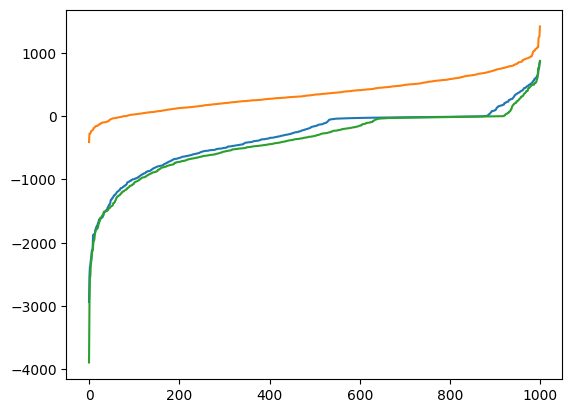

In [60]:
pyplot.plot(numpy.sort(real_market_distribution.market_trade(s, br, real_aq_mean)))
pyplot.plot(numpy.sort(real_market_distribution.market_trade(s, br, optimized_x)))
pyplot.plot(numpy.sort(real_market_distribution.market_trade(s, br, predicted_aq_mean)))

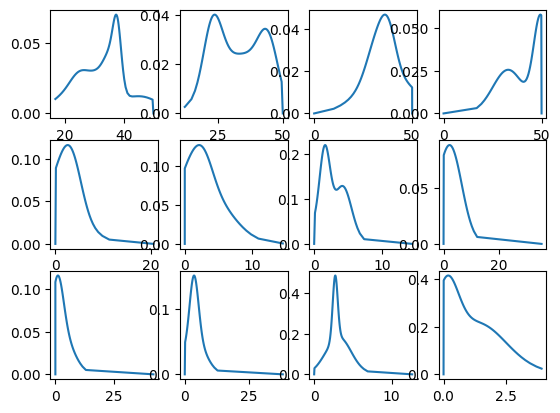

In [61]:
real_market_distribution.plot(1)

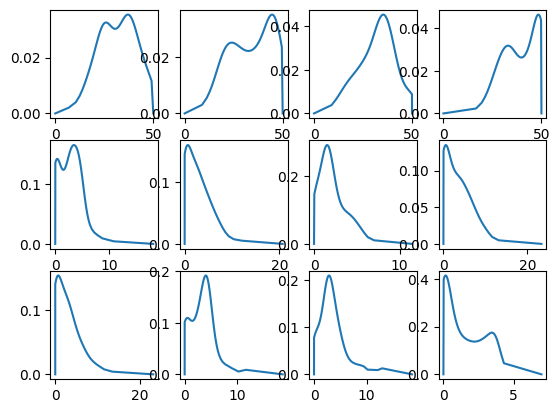

In [62]:
mixed_market.plot(1)

0.061224489795918366
0.08163265306122448
0.07142857142857142
0.061224489795918366
0.07142857142857142
0.07142857142857142
0.08163265306122448
0.08163265306122448
0.07142857142857142
0.08163265306122448


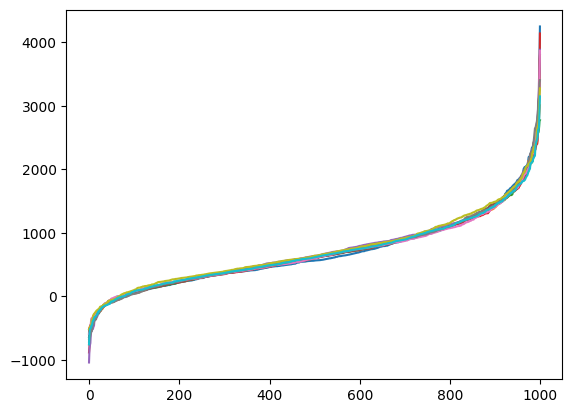

In [63]:
for _ in range(10):
    print(
        yieldindex.zero_quantile(
            real_market_distribution.market_trade(s, br, optimized_x),
            # real_market_distribution.market_trade(s, br, predicted_aq_mean),
            real_market_distribution.market_trade(s, br, real_aq_mean)
        )
    )
    pyplot.plot(
        # yieldindex.difference_quantile(
        #     real_market_distribution.market_trade(s, br, optimized_x),
        #     real_market_distribution.market_trade(s, br, real_aq_mean)
        # )
        numpy.sort(
            real_market_distribution.market_trade(s, br, optimized_x) - real_market_distribution.market_trade(s, br, real_aq_mean)
        )
    )